In [1]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import model_selection, ensemble, decomposition, svm
from matplotlib import pyplot as plt

In [2]:
file_path = '/Users/JQC/Desktop/Santander/train.csv'
data = pd.read_csv(file_path)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
file_path = '/Users/JQC/Desktop/Santander/test.csv'
test_data = pd.read_csv(file_path)
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
# type(data.isnull().mean())
# 数据没有缺失值
(data.isnull().mean() > 0).sum()

0

In [6]:
data.shape

(200000, 202)

In [7]:
# pd.Series()
data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [7]:
# 存在样本不平衡问题 将近9:1的比例
data['target'].value_counts()[0] / data['target'].value_counts()[1]

8.951238929246692

In [8]:
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
1%,0.000000,4.424795,-9.883609,5.456700,2.515897,7.559999,-21.060402,3.600600,9.766999,-6.732503,...,-6.635901,1.338400,-1.246204,-5.986603,11.150198,-3.203203,-8.839802,6.816799,8.562298,-26.192008
10%,0.000000,6.857670,-7.000500,7.395590,4.065670,8.909390,-15.704340,4.301800,12.081880,-4.232800,...,-2.685500,3.589590,0.003790,-1.919400,13.918380,-1.971110,-5.081510,7.733900,11.972590,-17.567480
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
90%,1.000000,14.663900,3.650430,14.175110,9.450500,13.194000,4.860610,6.557210,21.157600,4.645600,...,9.255510,11.407920,3.862910,8.470010,22.193120,1.723910,9.338330,10.130500,19.735900,10.241730


In [11]:
# X = data[data.columns[data.columns != 'target']]
X = data.iloc[:, 2:]

y = data['target']

In [12]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


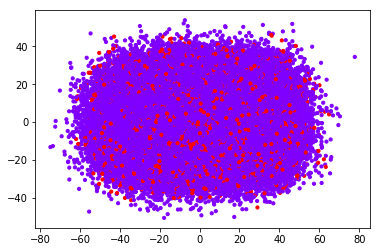

In [15]:
pca = decomposition.PCA(n_components=2).fit_transform(X)


plt.figure()
plt.scatter(pca[:, 0], pca[:, 1], c=y, cmap='rainbow', s=10)
plt.show()

In [16]:
# clf = svm.SVC(gamma='scale').fit(X, y)
# clf.score(X, y)
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.3, random_state=0)

In [17]:
for i in [X_train,X_test, y_train, y_test]:
    i.index = range(i.shape[0])

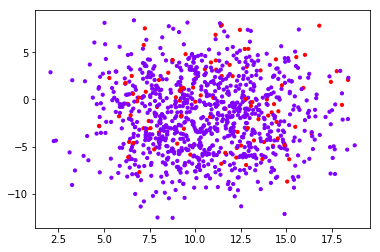

In [23]:
plt.figure()
plt.scatter(X_train.iloc[:1000, 0], X_train.iloc[:1000, 1], c=y_train[:1000], cmap='rainbow', s=10)
plt.show()

In [24]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print(rfc.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")


0.8981166666666667


'10:09'

In [25]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=100, 
                                      class_weight='balanced',
                                     ).fit(X_train, y_train)
print(rfc.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")


0.8981


'05:13'

In [ ]:
start = time.time()
svc = svm.SVC(gamma='scale', class_weight='balanced').fit(X_train, y_train)
print(svc.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")


In [22]:
time.time() - start

14.175712823867798

'00:24'